In [1]:
import numpy as np
import matplotlib.pyplot as plt

from RigidWallOverdampedLangevin3D import RigidWallOverdampedLangevin3D 

from mpl_toolkits import mplot3d
from scipy.signal import correlate

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 140

# Langevin 3D overdamped close rigid wall

In [2]:
langevin3D = RigidWallOverdampedLangevin3D(dt=1/60, Nt=100000, R=1.5e-6, rho=1050, x0=(0., 0., 1.e-6))
langevin3D.trajectory()

## 1. Trajectory

C:\Users\Shadow\PycharmProjects\StageObjet2020\OverdampedLangevin3D.py:74: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\Shadow\Anaconda3\envs\stage2020\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


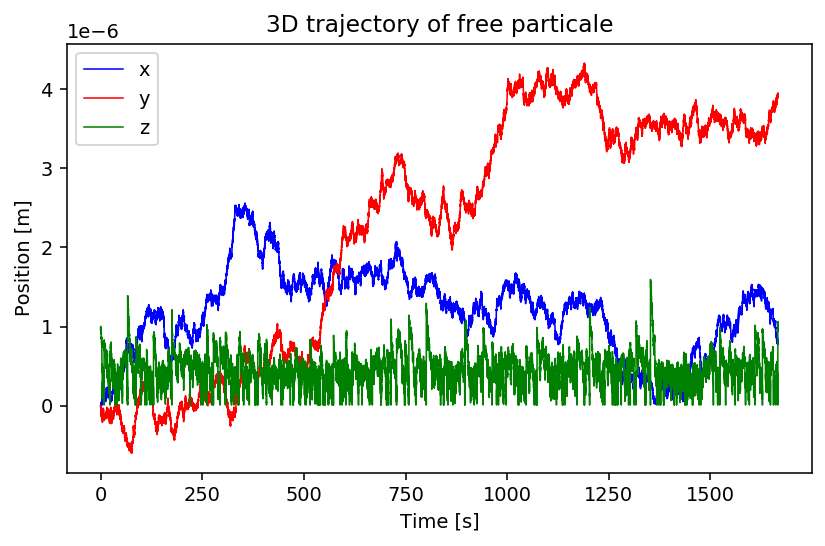

In [3]:
langevin3D.plotTrajectory()

## 2. Mean square displacement

In [4]:
MSDx = langevin3D.MSD1D("x", output=True)
MSDy = langevin3D.MSD1D("y", output=True)
MSDz = langevin3D.MSD1D("z", output=True)

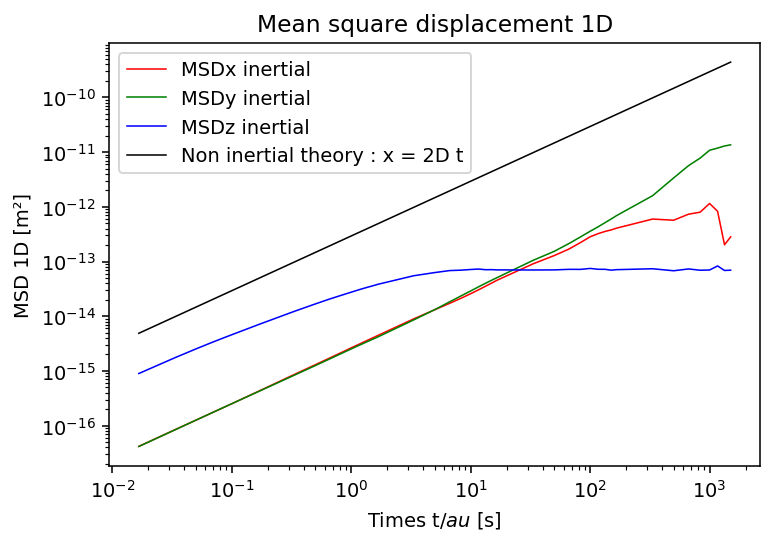

In [5]:
fig1 = plt.figure()
plt.loglog(
    langevin3D.t[langevin3D.list_dt_MSD],
    MSDx,
    color="red",
    linewidth=0.8,
    label="MSDx inertial",
)
plt.loglog(
    langevin3D.t[langevin3D.list_dt_MSD] ,
    MSDy,
    color="green",
    linewidth=0.8,
    label="MSDy inertial",
)
plt.loglog(
    langevin3D.t[langevin3D.list_dt_MSD] ,
    MSDz,
    color="blue",
    linewidth=0.8,
    label="MSDz inertial",
)
plt.plot(
    langevin3D.t[langevin3D.list_dt_MSD] ,
    (2 * langevin3D.kb * langevin3D.T / langevin3D.gamma)
    * langevin3D.t[langevin3D.list_dt_MSD],
    color="black",
    linewidth=0.8,
    label="Non inertial theory : x = 2D t",
)
plt.xlabel("Times t/$ \tau $ [s]")
plt.ylabel("MSD 1D [m²]")
plt.title("Mean square displacement 1D")
plt.legend()
plt.show()

## 3. Probability density function of z

No handles with labels found to put in legend.


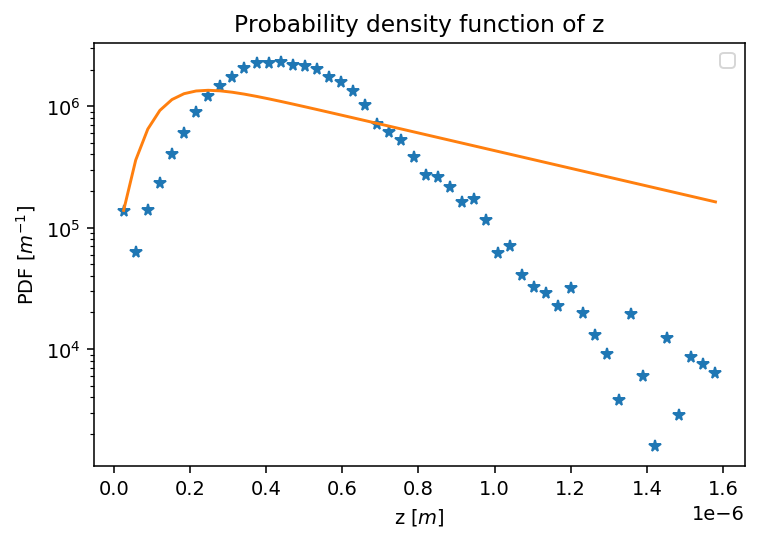

In [6]:
axis = "z"
nbTimesIntervalle = [10, 100, 500]

hist, bin_edges = np.histogram(langevin3D.z, bins=50, density=True)
binsPosition = (bin_edges[:-1] + bin_edges[1:]) / 2
hist = hist * 1/np.trapz(hist,binsPosition)

pdf_theo = np.exp( -(4) * np.exp(- binsPosition/langevin3D.lD) - binsPosition/langevin3D.lB)
pdf_theo = pdf_theo * 1/np.trapz(pdf_theo,binsPosition) # normalised

plt.semilogy(binsPosition,hist, "*")
plt.plot(binsPosition, pdf_theo, "-")

plt.title("Probability density function of " + axis)
plt.xlabel(axis + " $[m]$")
plt.ylabel("PDF $[m^{-1}]$")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
#plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.legend()
plt.show()

## 4. Probability density function of $\Delta$z

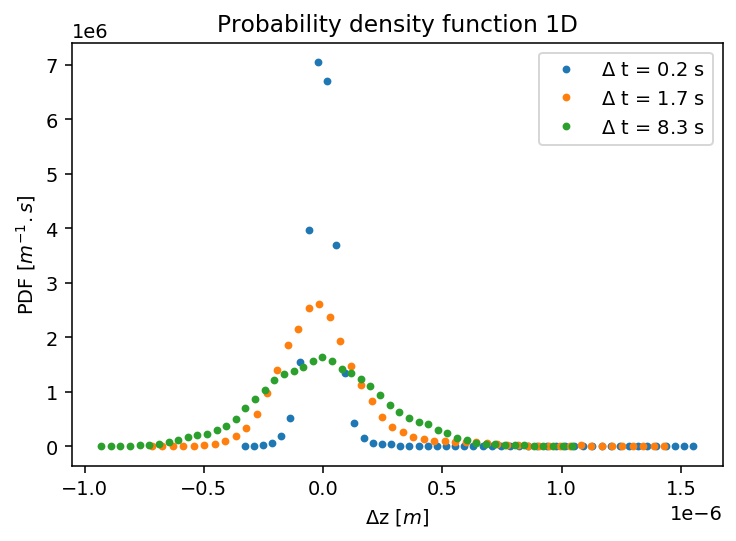

In [7]:
axis = "z"
nbTimesIntervalle = [10, 100, 500]

for i in nbTimesIntervalle:
    hist, binsPosition = langevin3D.dXDistribution1D(axis, i, bins=50, output=True)
    plt.plot(binsPosition,hist, ".", label="$\Delta$ t = {:.1f} s".format(i*langevin3D.dt))
plt.title("Probability density function 1D")
plt.xlabel("$\\Delta$" + axis + " $[m]$")
plt.ylabel("PDF $[m^{-1}.s]$")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.legend()
plt.show()

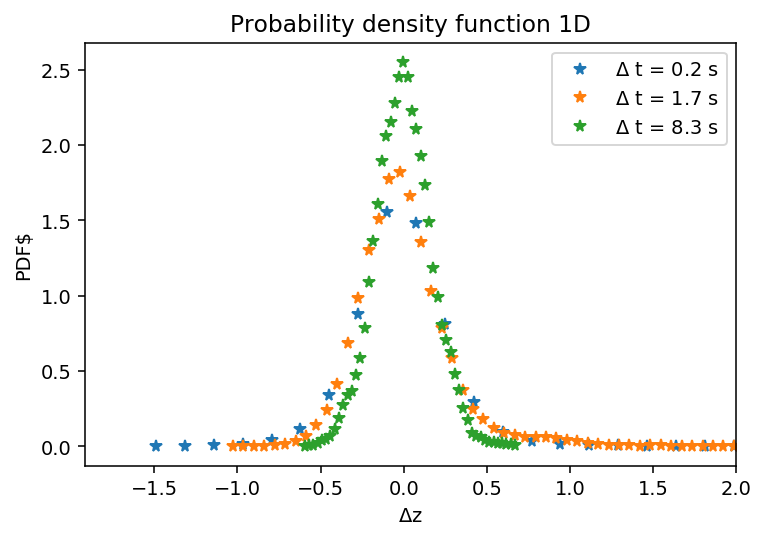

In [8]:
axis = "z"
nbTimesIntervalle = [10, 100, 500]

m = langevin3D.m
kb = langevin3D.kb
T = langevin3D.T

for i in nbTimesIntervalle:
    hist, binsPosition = langevin3D.dXDistribution1D(axis, i, bins=50, output=True)
    
    x_hist = binsPosition/np.sqrt(2*langevin3D.D*langevin3D.dt*i)
    y_hist = hist
    normalisation_y = 1/np.trapz(y_hist,x_hist)
    
    plt.plot(x_hist,y_hist * normalisation_y, "*", label="$\Delta$ t = {:.1f} s".format(i*langevin3D.dt))

plt.title("Probability density function 1D")
plt.xlabel("$\\Delta$" + axis)
plt.ylabel("PDF$")
plt.ticklabel_format(axis="x", style="sci", scilimits=(0, 0))
plt.ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
plt.axis([None, 2, None, None])
plt.legend()
plt.show()